<a href="https://colab.research.google.com/github/NeelvaniVarsha/MLLab/blob/main/Lab08_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris (1).csv to iris (1).csv


In [3]:
df = pd.read_csv('iris (1).csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
X = df.drop(columns=['species'])
y = df['species']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)

In [7]:
default_score = accuracy_score(y_test, y_pred_default)
print(f"Default RF accuracy (n_estimators=10): {default_score:.4f}")

Default RF accuracy (n_estimators=10): 1.0000


In [8]:
scores = []
n_range = range(1, 101)

In [9]:
for n in n_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [10]:
best_score = max(scores)
best_n = n_range[scores.index(best_score)]
print(f"Best RF accuracy: {best_score:.4f} with n_estimators={best_n}")

Best RF accuracy: 1.0000 with n_estimators=1


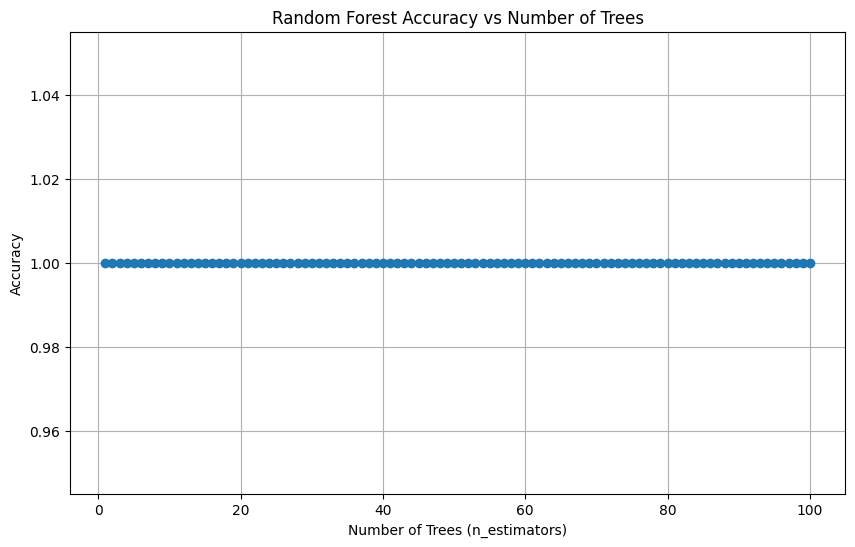

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(n_range, scores, marker='o')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()